<a href="https://colab.research.google.com/github/rksquared/prep_basics/blob/master/Fundamentals_of_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline
np.random.seed(42)

This will just generate our dataset, essentially x being 2 coordinates and y being a 0 or a 1

In [0]:
x, y = sklearn.datasets.make_gaussian_quantiles(mean = None, cov = 0.7, n_samples = 200, n_classes = 2,
                                                n_features = 2, shuffle = True, random_state = None)

Just to see what our data looks like

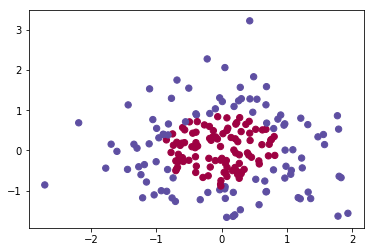

In [0]:
x, y = x.T, y.reshape(1, x.shape[0])
plt.scatter(x[0, :], x[1, :], c = y[0], s = 40, cmap = plt.cm.Spectral);

In [0]:
x.shape

(2, 200)

In [0]:
y.shape

(1, 200)

##Why do we need machine learning?
It allows us to determine the function of data that would be hard to graph otherwise

Let's try logistic regression with this data

In [0]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(x.T, y.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Somewhat arbitrary function just to see what the data looks like

In [0]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[0, :].min() - 1, x[0, :].max() + 1
    y_min, y_max = x[1, :].min() - 1, x[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    z = model(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
    plt.scatter(x[0, :], x[1, :], c=y[0], cmap=plt.cm.Spectral)
    print(z)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


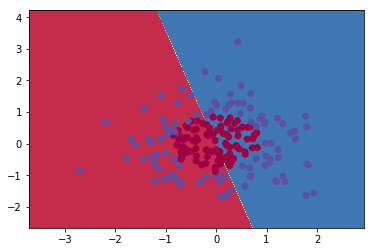

In [0]:
plot_decision_boundary(lambda n: clf.predict(n), x, y)

In [0]:
preds = clf.predict(x.T)
print('Accuracy: {}%'.format(float((np.dot(y, preds) + np.dot(1 - y, preds)) / float(y.size) * 100)))

Accuracy: 50.0%


That isn't too good...

In [0]:
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0])

In [0]:
y

array([[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0]])

###Let's try it with machine learning!
First, we will define the number of examples (x) we have
  the number of outputs we have (y), our number of hidden layers, and our learning rate

In [0]:
x_n = x.shape[0]
y_n = y.shape[0]
hidden = 4
lr = 0.001

We need to define our weights and biases. Uses the equation of a slope
>$y = mx + b$

where y is the output, m is the weight (W1, W2), x is the input, and b is the bias

As a note, the weights were at first initialized as 0s when this concept was first introduced. However, it turns out initializing them as random numbers works better. Pretty sure this is just because it gives the network something to work with as opposed to starting from nothing.

In [0]:
W1 = np.random.randn(hidden, x_n) * 0.01
b1 = np.zeros(shape=(hidden, 1))
W2 = np.random.randn(y_n, hidden) * 0.01
b2 = np.zeros(shape=(y_n, 1))

We will use the sigmoid function which looks like this

>![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)


>$y = \frac{1}{1 + e^{-x}}$

In [0]:
def sigmoid(x):
  s = 1 / (1 + np.exp(-x))
  return s

We also will need the tanh activation function, which looks like
>![](https://i2.wp.com/sefiks.com/wp-content/uploads/2017/01/tanh.png?resize=456%2C300&ssl=1)

You may notice it looks similar to the sigmoid function, but the biggest difference is it goes from 1 to -1 as opposed to 1 to 0. We use this to not limit the data until the very end. When we use the sigmoid function, we are essentially predicting a probability. What is the probability that that our output will be greater than 0.5? We cannot do this with tanh because of the nature of our data. It is either 0 or 1

Now for the forward propogation

Z1 is just the slope equation where the input is x

A1 is the first activation function tanh where the input is Z1

Z2 is the slope equation where the input is A1

A2 is the output after Z2 is passed through our sigmoid function

In [0]:
Z1 = np.dot(W1, x) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

Looks like nonsense... what is actually happening?

In [0]:
print('X' + str(x.T[0]))
print('Z1' + str(Z1.T[0]))
print('A1' + str(A1.T[0]))
print('Z2' + str(Z2.T[0]))
print('A2' + str(A2.T[0]))

X[-0.39736776 -0.54661445]
Z1[ 0.00524814  0.00707668  0.00434928 -0.0008001 ]
A1[ 0.00524809  0.00707656  0.00434926 -0.0008001 ]
Z2[-0.00010789]
A2[0.49997303]


Now we have to compute the cost function tell our network how bad it did. We will use the cross entropy cost function which looks like

>$J = -\frac{1}{n}\sum_{i = 0}^n(y^{(i)}log(a^{[2](i)}) + (1 - y^{(i)})log(1-a^{[2](i)}))$

In [0]:
logprob = np.multiply(np.log(A2), y) + np.multiply(np.log(1 - A2), 1 - y)
cost = -np.sum(logprob) / 200 # 200 = n, just how many samples we have

Now where the magic actually happens, **BACKPROPOGATION**

We need to work backwards, starting with dZ2 which is the difference between our output A2 (sometimes called y_hat) and y, our actual predicted value

dW2 and dW1 will take all of the differences computed by dZ2 and dZ1 multiplied by the activation result, and average them

db2 and db1 does the same thing, but with the sum of the differences, averaged

In [0]:
dZ2 = A2 - y
dW2 = (1 / 200) * np.dot(dZ2, A1.T)
db2 = (1 / 200) * np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
dW1 = (1 / 200) * np.dot(dZ1, x.T)
db1 = (1 / 200) * np.sum(dZ1, axis=1, keepdims=True)

Finally, we just need to update the weights

In [0]:
W1 = W1 - lr * dW1
b1 = b1 - lr * db1
W2 = W2 - lr * dW2
b2 = b2 - lr * db2

That is it! But in order to make this work, we need to run these cells thousands of times. That is silly, so lets automate it using functions

We want the parameters to be passed through many places, so we will create a function to initialize them

In [0]:
def parameter_init(x_n, hidden, y_n):
  W1 = np.random.randn(hidden, x_n) * 0.01
  b1 = np.zeros(shape=(hidden, 1))
  W2 = np.random.randn(y_n, hidden) * 0.01
  b2 = np.zeros(shape=(y_n, 1))
  
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
  
  return parameters
    

This will be our forward pass

We added a 'cache' because we will want our Zs and As to be distributed among functions and we want a record of it



In [0]:
def forward(x,  params):
  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']
  
  Z1 = np.dot(W1, x) + b1
  A1 = np.tanh(Z1)

  Z2 = np.dot(W2,A1) + b2

  A2 = sigmoid(Z2)

  
  cache = {"Z1": Z1,
           "A1": A1,
           "Z2": Z2,
           "A2": A2}
  
  return A2, cache

Again, cost function (cross entropy)

In [0]:
def compute_cost(A2, y, params):
  n = y.shape[1] #or we could just declare 200
  
  logprob = np.multiply(np.log(A2), y) + np.multiply(np.log(1 - A2), 1 - y)
  cost = -np.sum(logprob) / n
  
  cost = np.squeeze(cost) # Remove single-dimensional entries from the shape of an array.
  
  return cost

And our backpropogation magic. It isn't too magical anymore, it is just math

Again, the grads or 'gradients' are what we want to pull from in multiple places. It is the result of what we get from backprop

In [0]:
def backward(params, cache, x, y):
  n = x.shape[1]
  
  W1 = params['W1']
  W2 = params['W2']
  A1 = cache['A1']
  A2 = cache['A2']

  dZ2 = A2 - y
  dW2 = (1 / 200) * np.dot(dZ2, A1.T)
  db2 = (1 / 200) * np.sum(dZ2, axis=1, keepdims=True)
  print(dZ2.shape)
  print(W2.shape)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
  print(dZ1.shape)
  dW1 = (1 / 200) * np.dot(dZ1, x.T)
  db1 = (1 / 200) * np.sum(dZ1, axis=1, keepdims=True)
  
  grads = {"dW1": dW1,
           "db1": db1,
           "dW2": dW2,
           "db2": db2}

  return grads

This is where we will update our parameters

In [0]:
def update_params(params, grads, lr):
  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']

  dW1 = grads['dW1']
  db1 = grads['db1']
  dW2 = grads['dW2']
  db2 = grads['db2']


  W1 = W1 - lr * dW1
  b1 = b1 - lr * db1
  W2 = W2 - lr * dW2
  b2 = b2 - lr * db2

  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}

  return parameters

And now putting it all together in a model. The print_cost just says if we want to print the cost on each 1000th iteration

In [0]:
def cool_model(x, hidden, y, iters, print_cost):
  x_n = x.shape[0]
  y_n = y.shape[0]
  h = hidden

  params = parameter_init(x_n, hidden, y_n)
  
  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']
  
  for i in range(iters):
    A2, cache = forward(x, params)
    cost = compute_cost(A2, y, params)
    grads = backward(params, cache, x, y)
    params = update_params(params, grads, lr = 0.03)
    
    if print_cost and i % 1000 == 0:
      print('Cost after iteration {}: {}'.format(i, cost))
      
  return params
  

This will call everything it knows from the parameters (sometimes you will hear them called the weights, they are the same thing) 

It will make a prediction by simply doing a forward pass and check the result. Here, since we just want a 1 or a 0, we just test against 0.5, but you can uncomment the print statement to actually see what the prediction is

In [0]:
def predict(params, x):
  A2, cache = forward(x, params)
  #print(A2)
  pred = A2 > 0.5
  
  return pred

In [0]:
params = cool_model(x = x, hidden = 4, y = y, iters = 100, print_cost = True)

(1, 200)
(1, 4)
(4, 200)
Cost after iteration 0: 0.6931411498315017
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200)
(1, 4)
(4, 200)
(1, 200

And plot it again

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


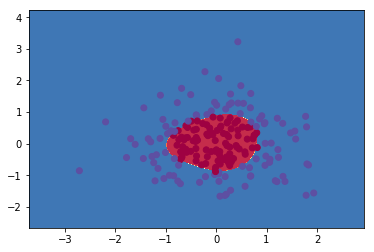

In [0]:
plot_decision_boundary(lambda x: predict(params, x.T), x, y)

Looks better...

What about the accuracy?

In [0]:
preds = predict(params, x)
print ('Accuracy: {}%'.format(float((np.dot(y, preds.T) + np.dot(1-y,1-preds.T))/float(y.size)*100))) 

Accuracy: 97.5%
